<a href="https://colab.research.google.com/github/hizafioramahardika/PCVK_Genap_2021/blob/main/Week11_Hiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hiza Fiora Mahardika** (2342729017)

1. Go to https://colab.research.google.com/. After making sure that Google Colab is connected to your Github, create a new notebook and name it "Week11.ipynb". Then import some libraries and access the folders on your Drive as follows.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Mounted at /content/drive


2. Implement 6 template matching methods in OpenCV using the cats_and_bunnies.jpg and cat2_templatejpg.jpg images as templates.

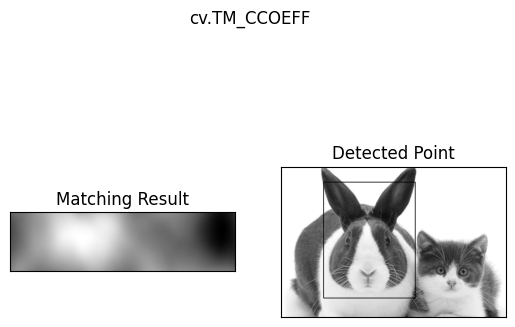

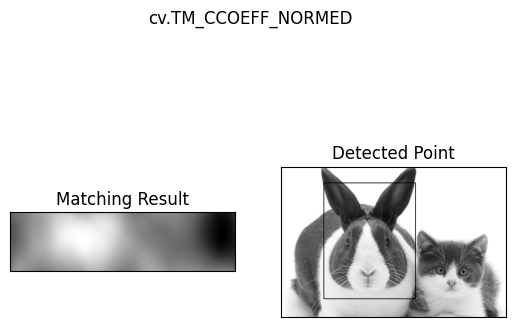

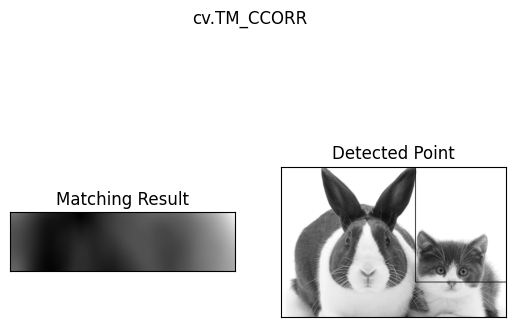

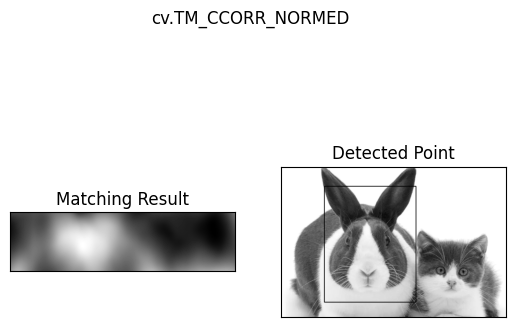

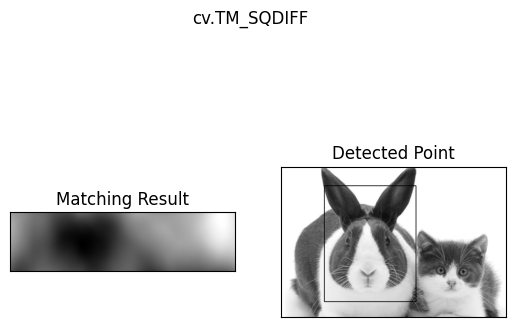

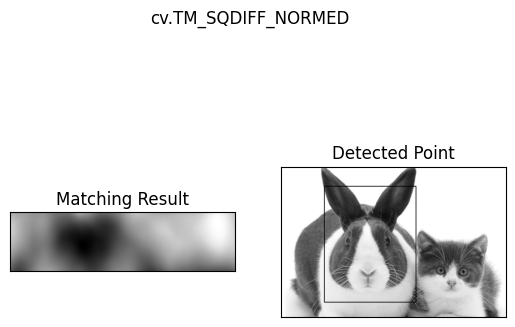

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('/content/cats_and_bunnies.jpg', 0)
img2 = img.copy()

template = cv.imread('/content/cat2_templatejpg.jpg', 0)
w, h = template.shape[::-1]

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    res = cv.matchTemplate(img, template, method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Ganti nilai warna dari 255 menjadi (0, 0, 255) untuk warna merah
    cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 2)

    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img, cmap='gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()

3. Implement the Sobel Edge Detection, Canny Edge Detection, and Laplacian Edge Detection methods in OpenCV using the parking-lot-cars.jpg image

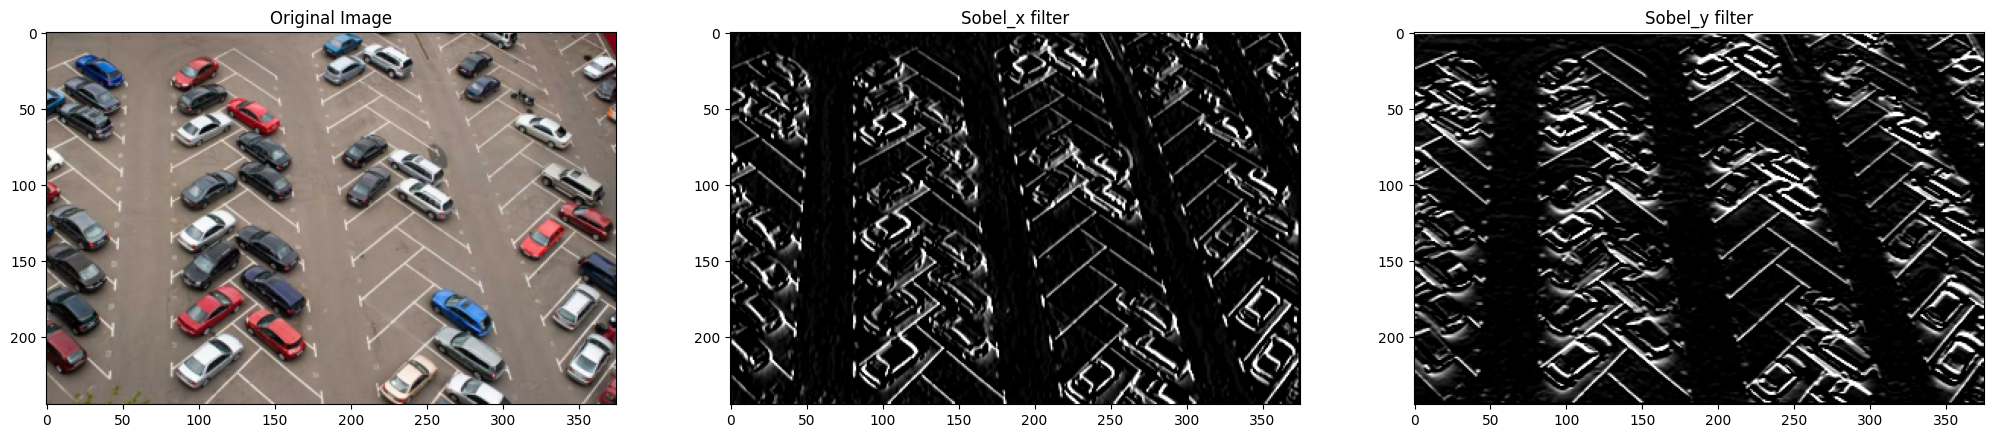

In [ ]:
# Load the image
image_original = cv.imread('/content/parking-lot-cars.png', cv.IMREAD_COLOR)

# Convert image to grayscale
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)

# Sobel kernels
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Filter the image using filter2D
filtered_image_y = cv.filter2D(image_gray, -1, sobel_y)
filtered_image_x = cv.filter2D(image_gray, -1, sobel_x)

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 25))
ax1.set_title('Original Image')
ax1.imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))
ax2.set_title('Sobel_x filter')
ax2.imshow(filtered_image_x, cmap='gray')
ax3.set_title('Sobel_y filter')
ax3.imshow(filtered_image_y, cmap='gray')


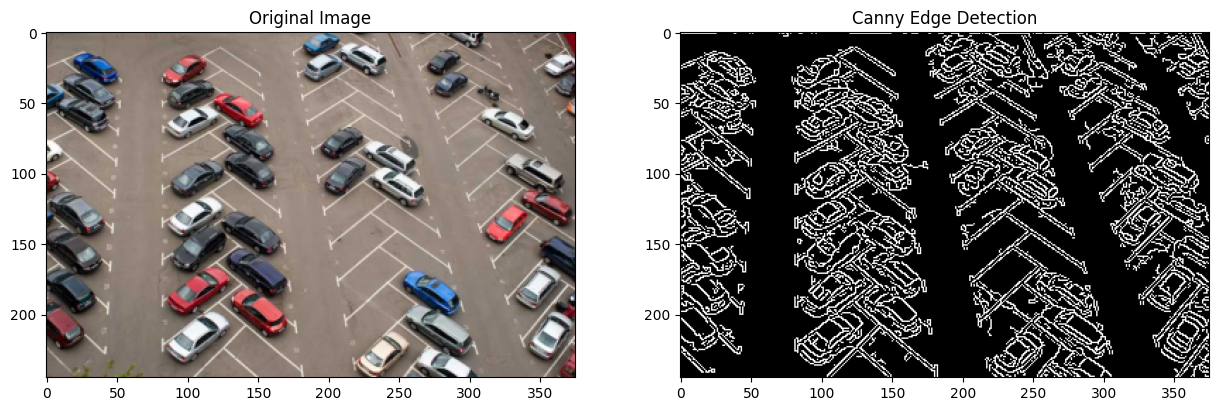

In [ ]:
# Load the image
image_original = cv.imread('/content/parking-lot-cars.png', cv.IMREAD_COLOR)

# Convert image to grayscale
image_gray = cv.cvtColor(image_original, cv.COLOR_BGR2GRAY)

# Apply Canny edge detection
filtered_image = cv.Canny(image_gray, threshold1=20, threshold2=200)

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
ax1.set_title('Original Image')
ax1.imshow(cv.cvtColor(image_original, cv.COLOR_BGR2RGB))
ax2.set_title('Canny Edge Detection')
ax2.imshow(filtered_image, cmap='gray')

plt.show()

4. Implement the Sobel Edge Detection, Canny Edge Detection, and Laplacian Edge Detection methods in OpenCV using the parking-lot-cars.jpg image, resulting in the following output:

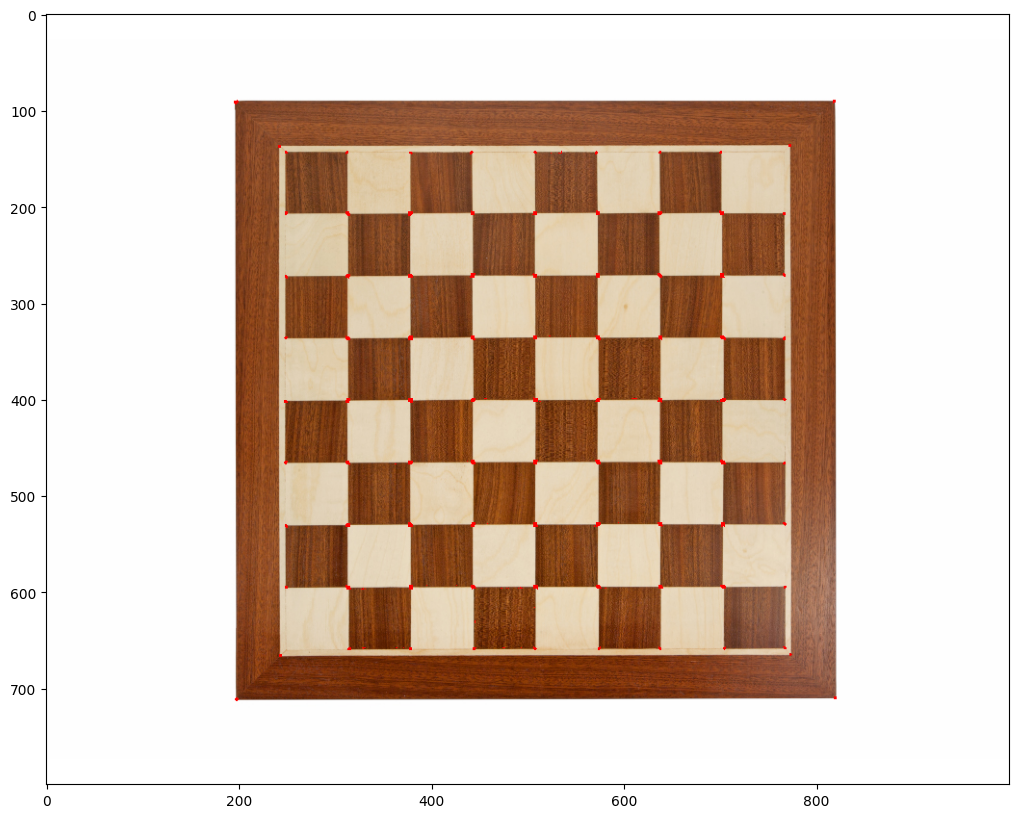

In [ ]:
# Load the input image
input_img = cv.imread('/content/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

# Harris corner detection
dst = cv.cornerHarris(gray_img, 3, 1, 0.04)

# Convert the image to float32 for further processing
gray_img = np.float32(gray_img)

# Apply Harris corner detection with different parameters for visualization
harris_output = cv.cornerHarris(gray_img, 2, 3, 0.04)

# Dilate the Harris corner response to highlight corners
harris_output = cv.dilate(harris_output, None)

# Threshold to mark the corners
input_img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Display the result
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
plt.show()


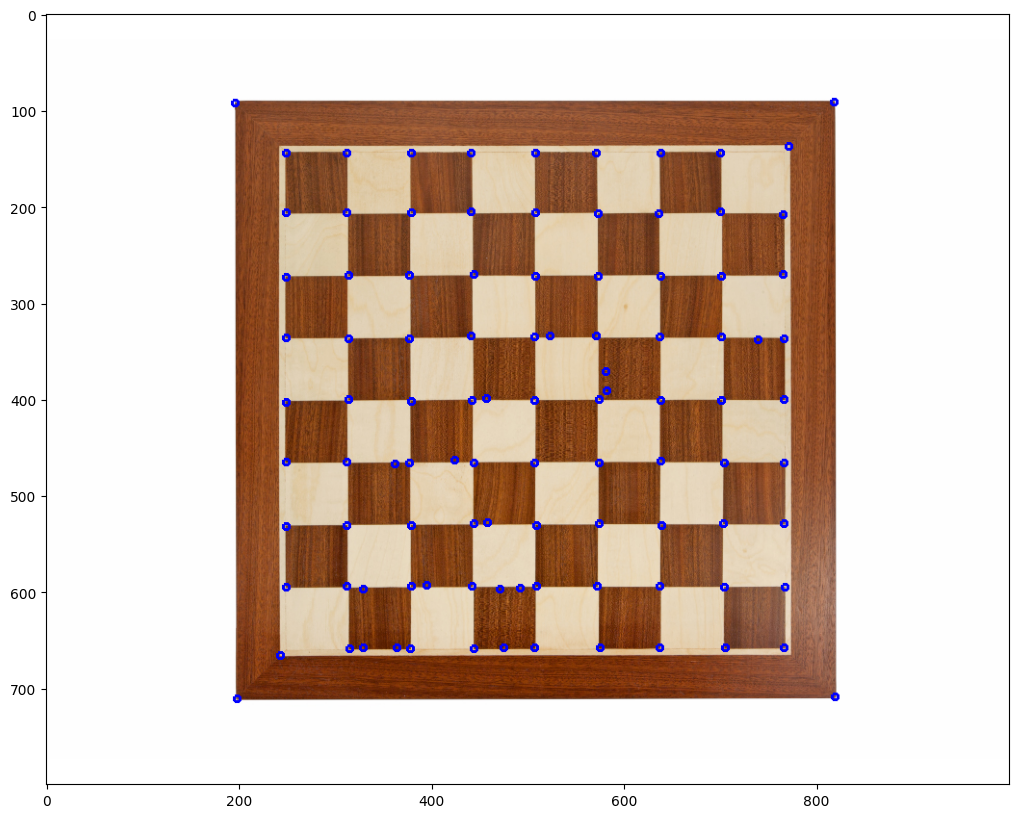

In [ ]:
# Load the input image
input_img = cv.imread('/content/chess-board.jpg')
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

# Shi-Tomasi corner detection
corners = cv.goodFeaturesToTrack(gray_img, 100, 0.01, 10)
corners = np.int0(corners)

# Mark the corners on the original image
for i in corners:
    x, y = i.ravel()
    cv.circle(input_img, (x, y), 3, 255, 2)

# Display the result
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
plt.show()


5. Implement the Hough Transform method in OpenCV using the sudoku.jpg image. The stages of the grid detection process are in accordance with those contained in the theoretical review, resulting in the following output:

Number of Hough lines: 33
Number of filtered lines: 20


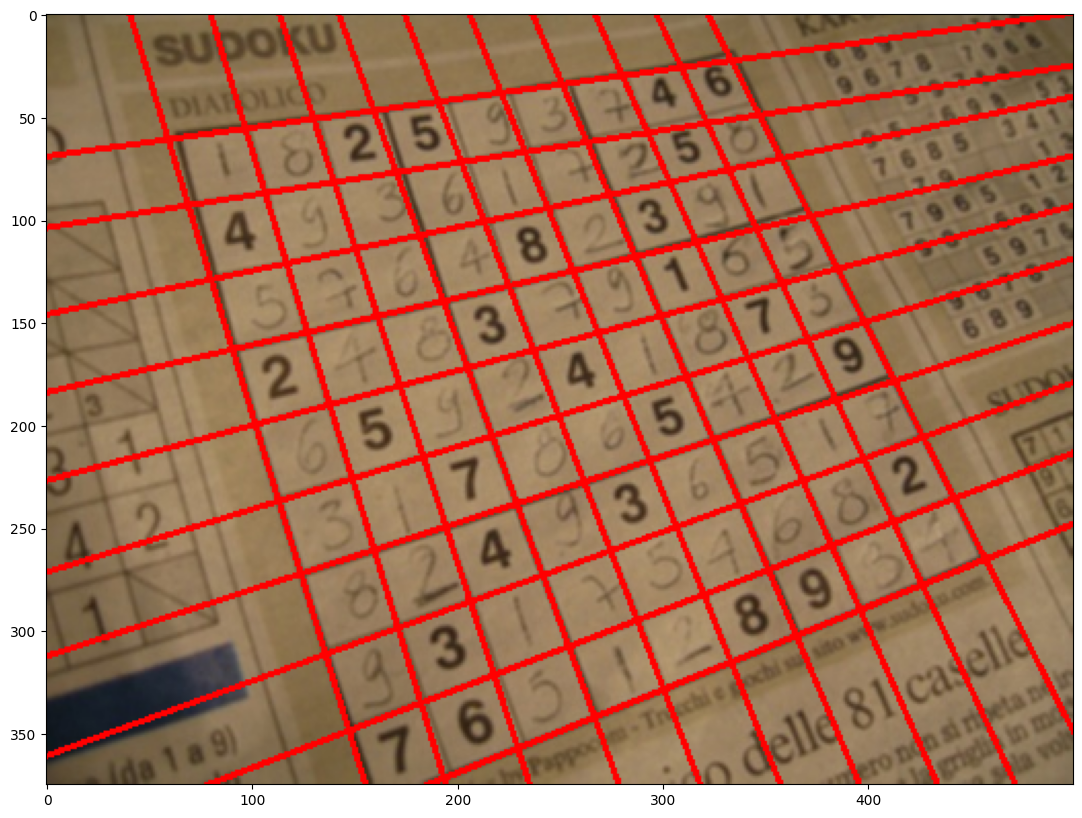

In [ ]:
input_img = cv.imread('/content/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny(img_gray, 90, 150, apertureSize=3)

kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

lines = cv.HoughLines(edges, 1, np.pi / 180, 150)

if not lines.any():
    print('No lines were found')
    exit()

rho_threshold = 15
theta_threshold = 0.1

similar_lines = {i: [] for i in range(len(lines))}
for i in range(len(lines)):
    for j in range(len(lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

indices = [i for i in range(len(lines))]
indices.sort(key=lambda x: len(similar_lines[x]))

line_flags = len(lines) * [True]
for i in range(len(lines) - 1):
    if not line_flags[indices[i]]:
        continue

    for j in range(i + 1, len(lines)):
        if not line_flags[indices[j]]:
            continue
        rho_i, theta_i = lines[indices[i]][0]
        rho_j, theta_j = lines[indices[j]][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            line_flags[indices[j]] = False

filtered_lines = []

for i in range(len(lines)):
    if line_flags[i]:
        filtered_lines.append(lines[i])

print('Number of Hough lines:', len(lines))
print('Number of filtered lines:', len(filtered_lines))

for line in filtered_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv.line(input_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
plt.show()


6. Implement the findContours () function in OpenCV for contour detection using the laptop.jpg image, resulting in the following output:

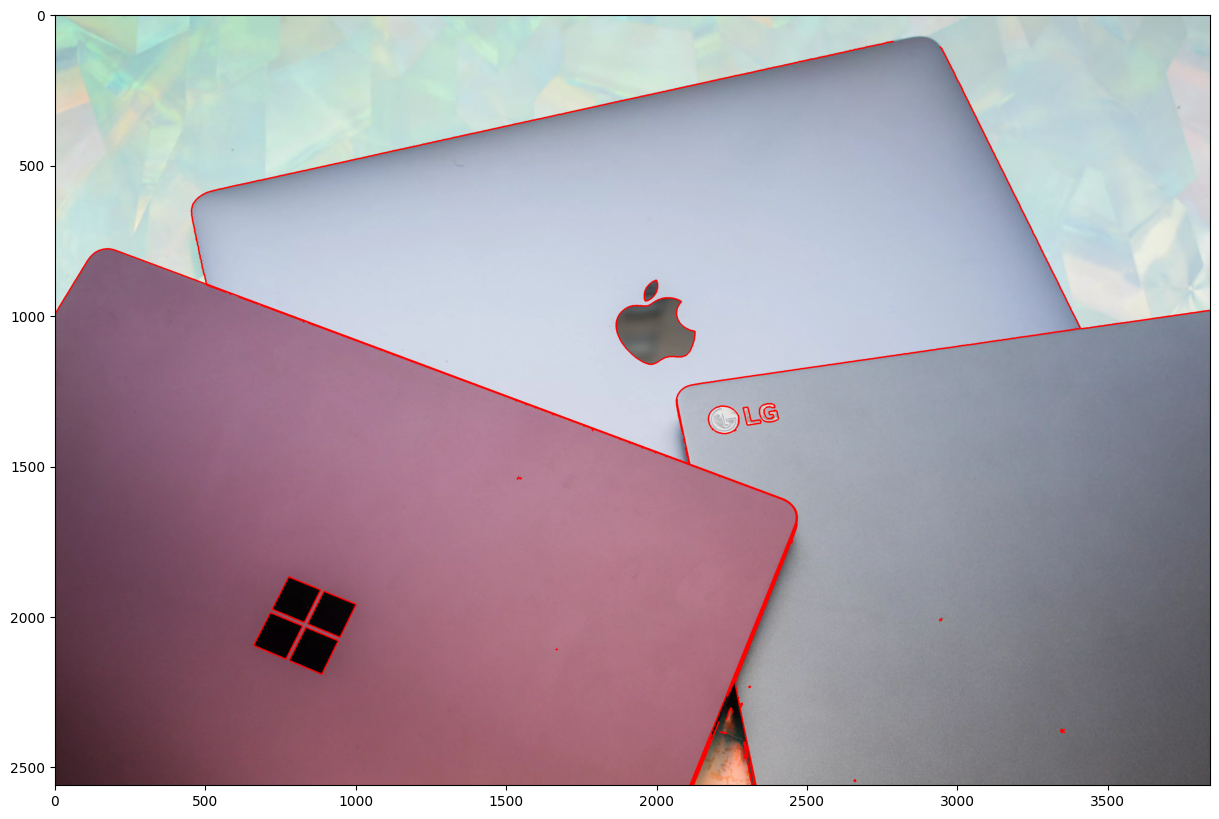

In [ ]:
img = cv.imread('/content/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Canny edge detection
edged = cv.Canny(img_gray, 30, 200)

# Find contours in the edged image
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Draw the contours on the original image
cv.drawContours(img, contours, -1, (0, 0, 255), 3)

# Display the result
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
